---
title: "ZK-Bootcamp - Homework 3 - Elliptic Curves"
date: 2025-06-24T00:00:00+00:00
author: Spoorthi Satheesha
layout: post
permalink: /zk-bootcamp-homework-3/
categories: Study
tags: [math, zk]
mathjax: true
excerpt: "Homework for Elliptic Curves of Rareskill's ZK Bootcamp"
seo_title: "ZK-Bootcamp - Homework 3 - Elliptic Curves"
seo_description: "Homework for Elliptic Curves of Rareskill's ZK Bootcamp"
---

In [1]:
!python -m pip install numpy
!python -m pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_elliptic_curve_addition(a, b, points=None, xlim=(-5, 5), ylim=(-5, 5)):
    """
    Plots the elliptic curve y^2 = x^3 + a*x + b and marks the given points.
    
    Args:
        a (float): Coefficient of x in the curve equation.
        b (float): Constant term in the curve equation.
        points (list of tuples): List of (x, y) points to mark on the curve.
        xlim (tuple): x-axis limits for the plot.
        ylim (tuple): y-axis limits for the plot.
        title (str): Title for the plot.
    """
    x = np.linspace(xlim[0], xlim[1], 800)
    y2 = x**3 + a*x + b
    mask = y2 >= 0
    x_real = x[mask]
    y_real = np.sqrt(y2[mask])

    # Plotting the elliptic curve
    plt.figure(figsize=(8,6))
    plt.plot(x_real, y_real, label=r"$y^2 = x^3 + {}x + {}$".format(a, b))
    plt.plot(x_real, -y_real, color='C0') 

    # Plotting the points, P1 + P2 = P3
    colors = ['red', 'green', 'blue']
    assert len(points) == 3
    for idx, pt in enumerate(points):
        plt.scatter(*pt, color=colors[idx % len(colors)], label=f'P{idx+1} {pt}')

    (x1, y1), (x2, y2), (x3, y3) = points[0], points[1], points[2]
    m = (y2 - y1) / (x2 - x1)
    x_line = np.linspace(xlim[0], xlim[1], 200)
    y_line = m * (x_line - x1) + y1
    # Plotting the line through P1 and P2
    plt.plot(x_line, y_line, color='purple', linestyle='--', label='Line through P1 and P2')
    # Plotting the vertical line through P3
    plt.axvline(x=x3, color='orange', linestyle='--', label='Flipping P1+P2 over x-axis')
    

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True)
    plt.title(
        r"Elliptic Curve $y^2 = x^3 + {}x + {}$, P1={} + P2={}".format(a, b, points[0], points[1])
    )
    plt.legend() 
    plt.show()

def plot_elliptic_curve_multiplication(a, b, points=None, xlim=(-5, 5), ylim=(-5, 5)):
    """
    Plots the elliptic curve y^2 = x^3 + a*x + b and marks the given points.
    
    Args:
        a (float): Coefficient of x in the curve equation.
        b (float): Constant term in the curve equation.
        points (list of tuples): List of (x, y) points to mark on the curve.
        xlim (tuple): x-axis limits for the plot.
        ylim (tuple): y-axis limits for the plot.
        title (str): Title for the plot.
    """
    x = np.linspace(xlim[0], xlim[1], 800)
    y2 = x**3 + a*x + b
    mask = y2 >= 0
    x_real = x[mask]
    y_real = np.sqrt(y2[mask])

    # Plotting the elliptic curve
    plt.figure(figsize=(8,6))
    plt.plot(x_real, y_real, label=r"$y^2 = x^3 + {}x + {}$".format(a, b))
    plt.plot(x_real, -y_real, color='C0') 

    # Plotting the points, 2P = P2
    colors = ['red', 'green', 'blue']
    assert len(points) == 2
    for idx, pt in enumerate(points):
        plt.scatter(*pt, color=colors[idx % len(colors)], label=f'P{idx+1} {pt}')

    (x1, y1), (x2, y2) = points[0], points[1]
    m = (y2 - y1) / (x2 - x1)
    x_line = np.linspace(xlim[0], xlim[1], 200)
    tangent_slope = (3 * x1**2 + a) / (2 * y1)
    y_tangent = tangent_slope * (x_line - x1) + y1
    # Plotting a tangent at P
    plt.plot(x_line, y_tangent, color='purple', linestyle='--', label='Tangent at P')
    # Plotting the vertical line through P2
    plt.axvline(x=x2, color='orange', linestyle='--', label='Flipping 2P over x-axis')
    

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True)
    plt.title(
        r"Elliptic Curve $y^2 = x^3 + {}x + {}$, 2P={}".format(a, b, points[0])
    )
    plt.legend() 
    plt.show()

In [3]:
# For elliptic curve y^2 = x^3 + ax + b,
# where a = -4 and b = 8, 
# the curve would be y^2 = x^3 - 4x + 8

a = -4
b = 8

#### Problem 1

Implement point addition 

In [4]:
def point_addition(p1, p2):
    assert p1 != p2, "Points must be different"
    x1, y1 = p1
    x2, y2 = p2

    assert x1 != x2, "X coordinates must be different"

    l = (y2 - y1) / (x2 - x1) 

    x3 = pow(l,2) - x1 - x2
    y3 = l*(x1 - x3) - y1
    p3 = (x3, y3)  
    return p3


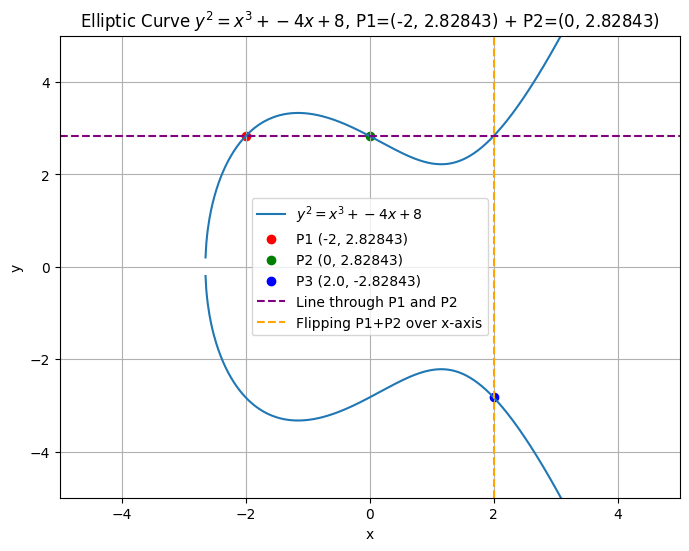

In [5]:
p1 = (-2, 2.82843)  
p2 = (0, 2.82843) 
p3 = point_addition(p1, p2)
expected_p3 = (2, -2.82843)
assert p3 == expected_p3
plot_elliptic_curve_addition(a, b, points=[p1, p2, p3])


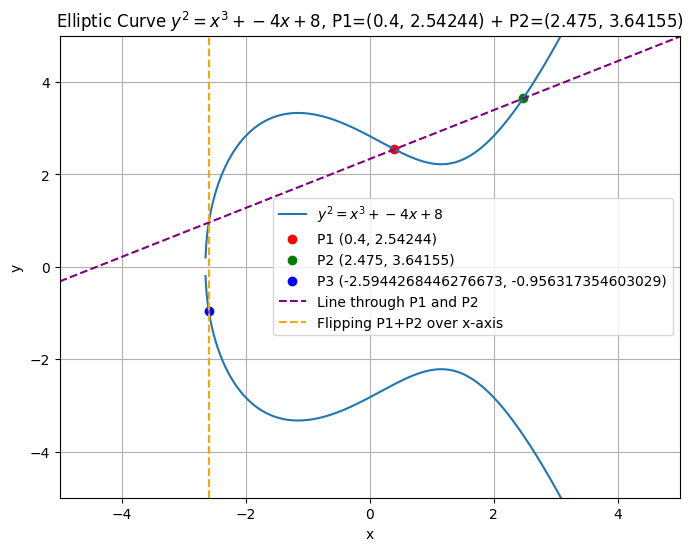

In [6]:
p1 = (0.4, 2.54244)  
p2 = (2.475, 3.64155) 
p3 = point_addition(p1, p2)
expected_p3 = (-2.5944268446276673, -0.956317354603029)
assert p3 == expected_p3
plot_elliptic_curve_addition(a, b, points=[p1, p2, p3])


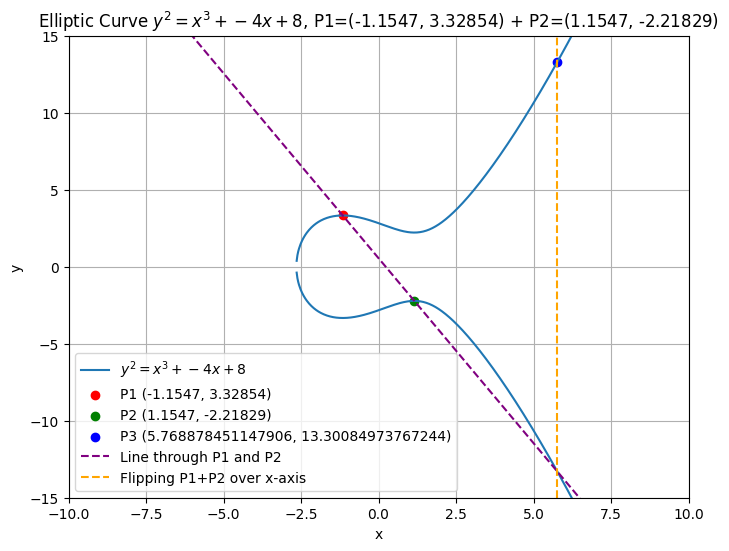

In [7]:
p1 = (-1.1547, 3.32854)  
p2 = (1.1547, -2.21829) 
p3 = point_addition(p1, p2)
expected_p3 = (5.768878451147906, 13.30084973767244)
assert p3 == expected_p3

plot_elliptic_curve_addition(a, b, points=[p1, p2, p3], xlim=(-10, 10), ylim=(-15, 15))

#### Problem 2

Implement point multiplication 

In [8]:
def point_multiplication(p):
    x, y = p

    l = (3*pow(x,2) + a)/(2*y) # Derivative of the curve at point P1

    x2 = pow(l,2) - (2*x)
    y2 = l*(x - x2) - y
    p2 = (x2, y2)  
    return p2


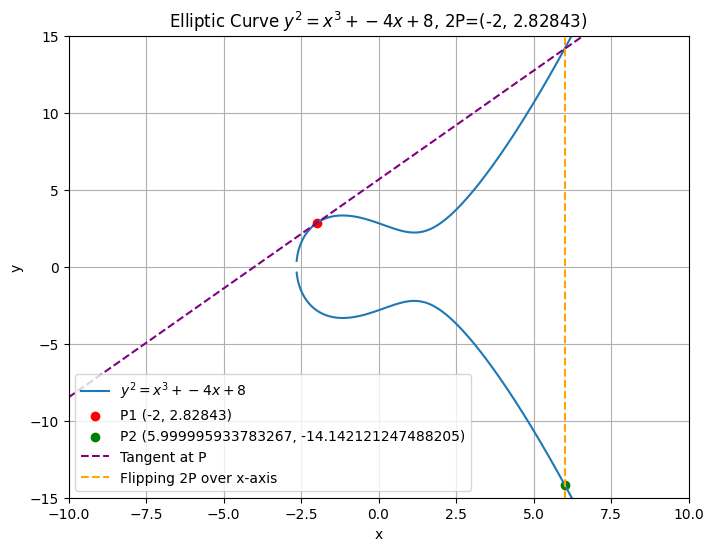

In [9]:
p = (-2, 2.82843)  
p2 = point_multiplication(p)
expected_p2 = (5.999995933783267, -14.142121247488205)
assert p2 == expected_p2
plot_elliptic_curve_multiplication(a, b, points=[p, p2], xlim=(-10, 10), ylim=(-15, 15))

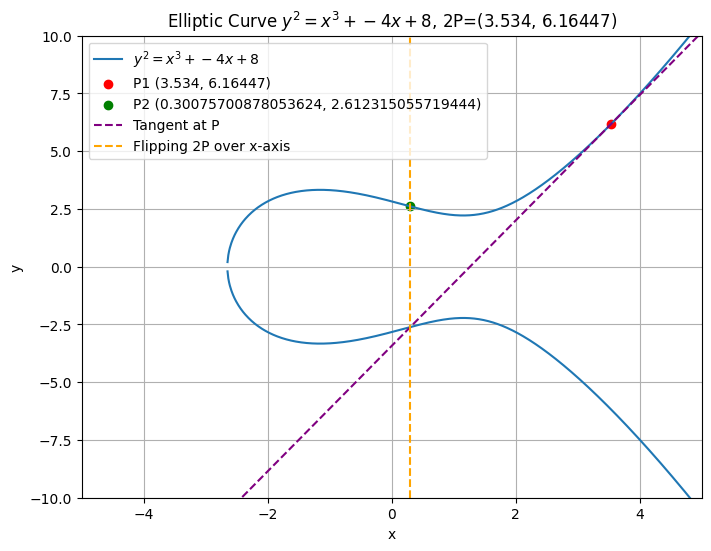

In [10]:
p = (3.534, 6.16447)  
p2 = point_multiplication(p)
expected_p2 = (0.30075700878053624, 2.612315055719444)
assert p2 == expected_p2
plot_elliptic_curve_multiplication(a, b, points=[p, p2], xlim=(-5, 5), ylim=(-10, 10))

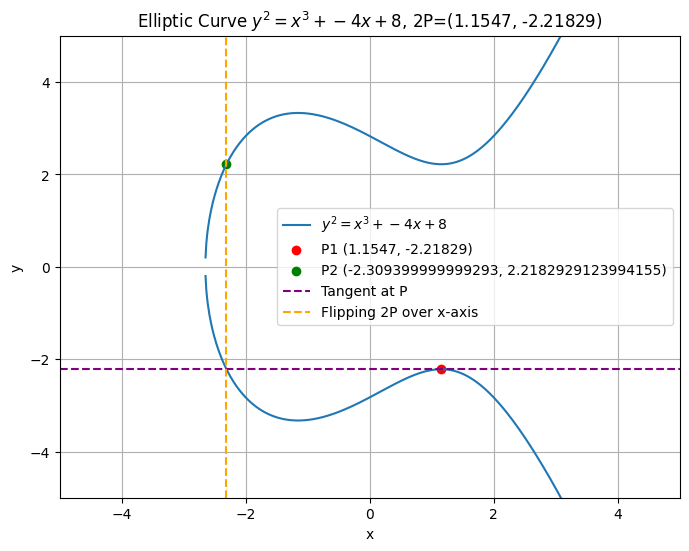

In [11]:
p = (1.1547, -2.21829)  
p2 = point_multiplication(p)
expected_p2 = (-2.309399999999293, 2.2182929123994155)
assert p2 == expected_p2
plot_elliptic_curve_multiplication(a, b, points=[p, p2])